# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [10]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

/var/folders/vv/79fy70ts56l7_wt8cgwk_qy40000gn/T/ipykernel_68209/3972790099.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter as gauss
/var/folders/vv/79fy70ts56l7_wt8cgwk_qy40000gn/T/ipykernel_68209/3972790099.py:8: DeprecationWarning: Please use `median_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import median_filter as med


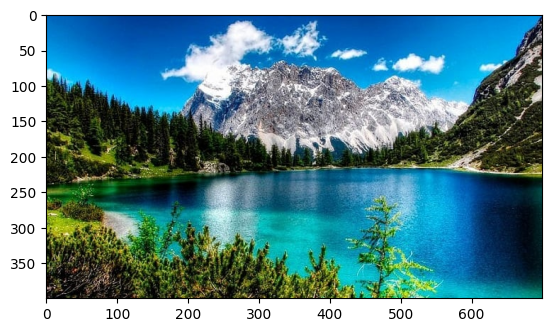

In [16]:
original_image = Image.open('data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

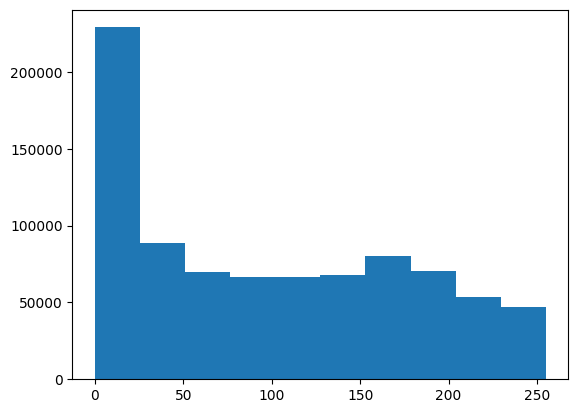

In [17]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

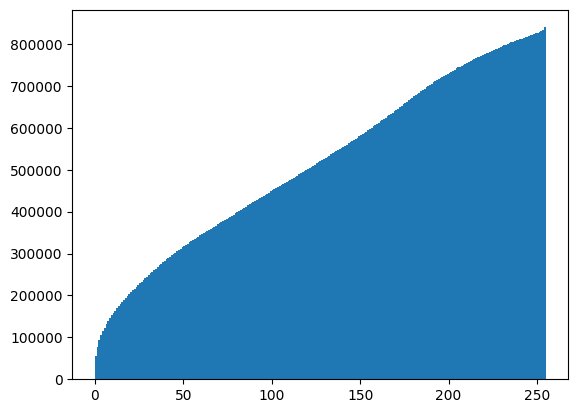

In [18]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

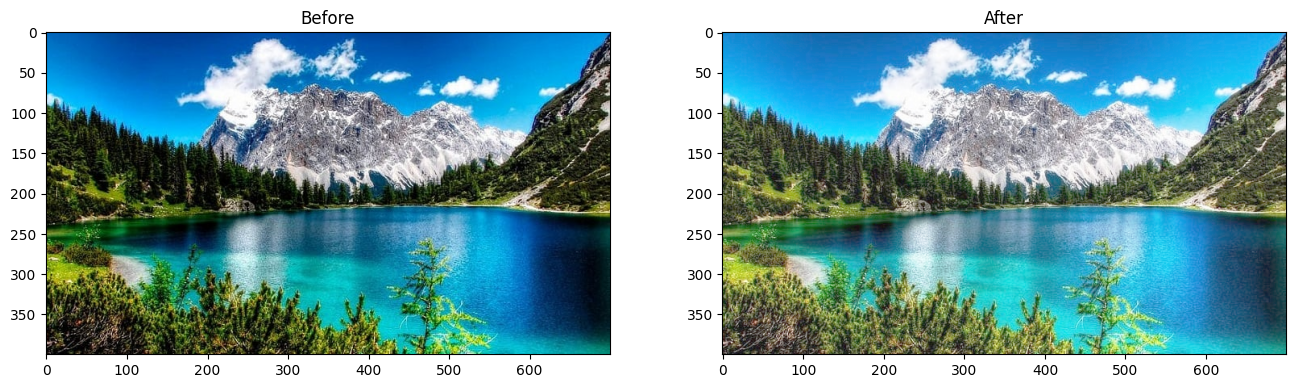

In [19]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

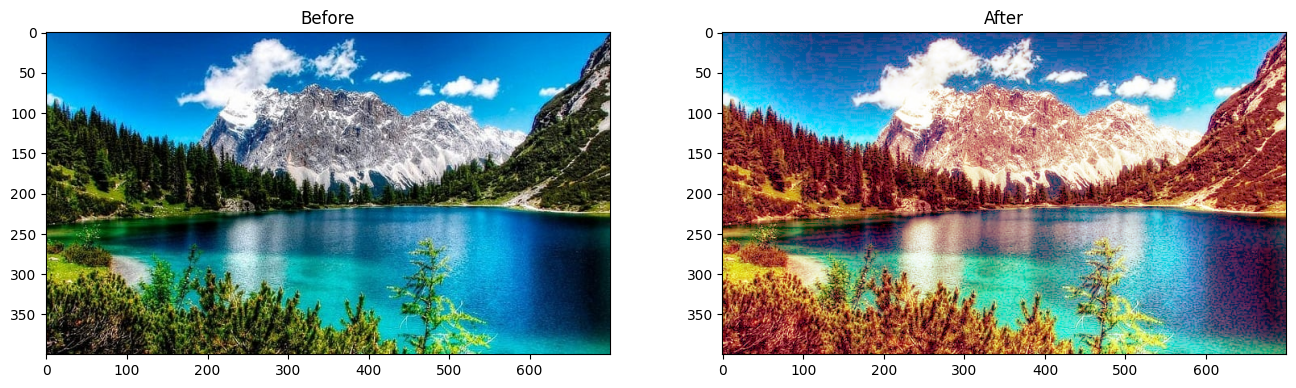

In [20]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

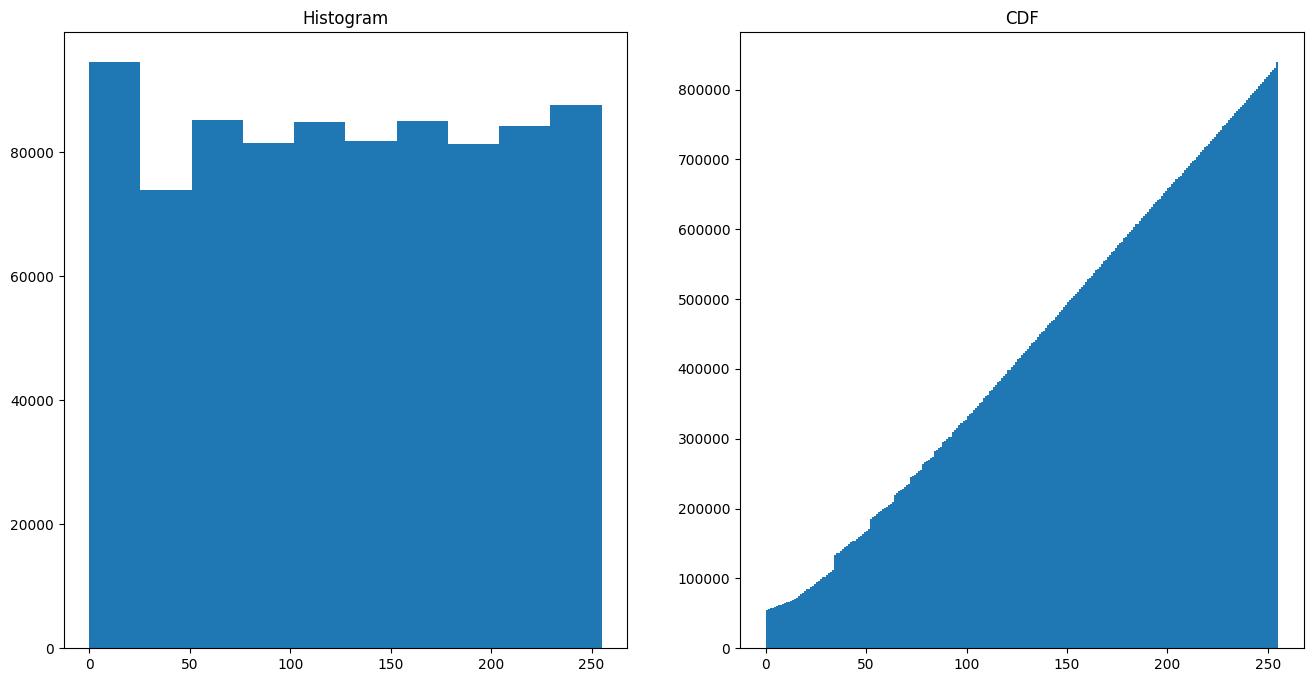

In [21]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

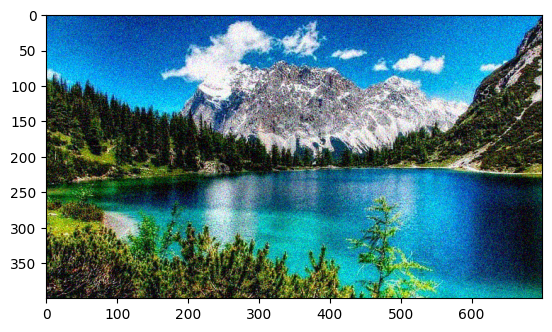

In [22]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

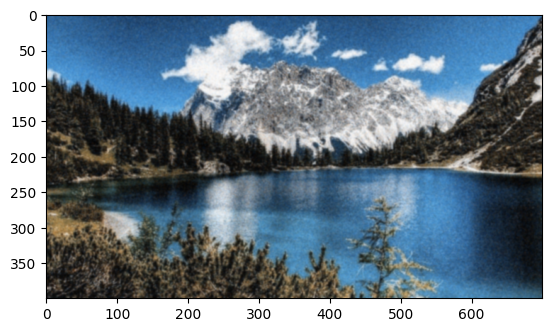

In [23]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

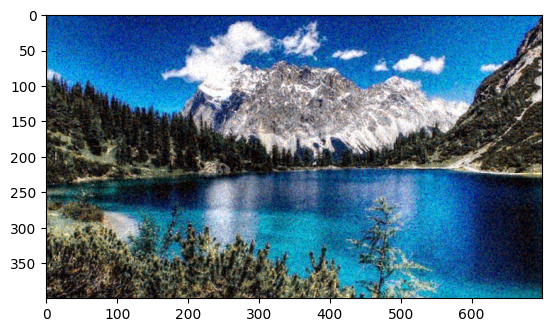

In [24]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [25]:
from image_slicer import slice

n = 4
slice('data/image.jpg', n)

(<Tile #1 - image_01_01.png>,
 <Tile #2 - image_01_02.png>,
 <Tile #3 - image_02_01.png>,
 <Tile #4 - image_02_02.png>)

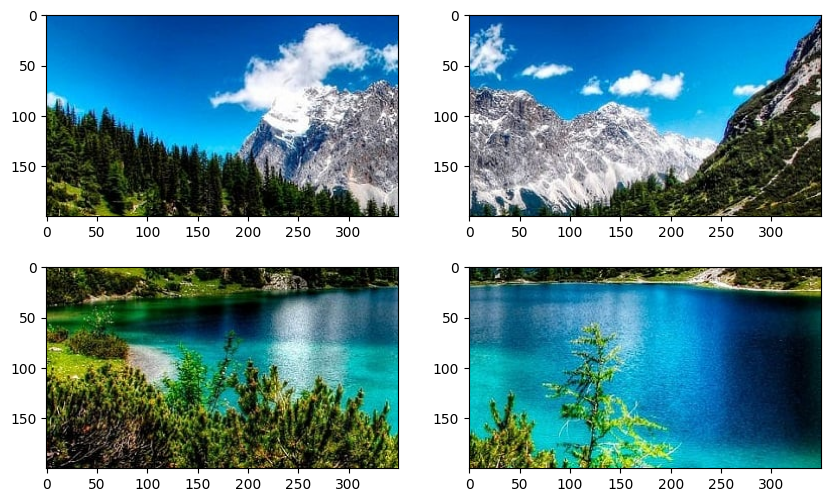

In [26]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

## Ejercicios

### 1. Investiga e implementa el método tile-based histogram equalization. En estos métodos, la imagen se particiona en diferentes ventanas (i.e. mosaicos) y los histogramas se calculan de forma independiente, aplicando la corrección sobre cada ventana.

La ecualización basada en mosaicos o tiles es una variación de la ecualización de histogramas tradicional aplicada localmente o en regiones más pequeñas en lugar de toda la imagen. Esta aproximación puede ayudar a mejorar algunas de las limitaciones de la ecualización del histograma global, especialmente en imagenes donde se presenta una variación en la iluminación y el contraste en algunas regiones.

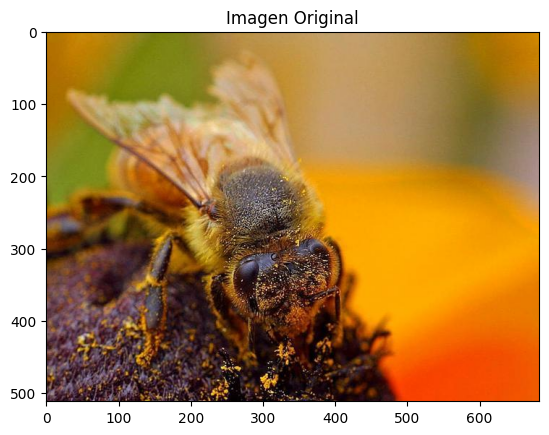

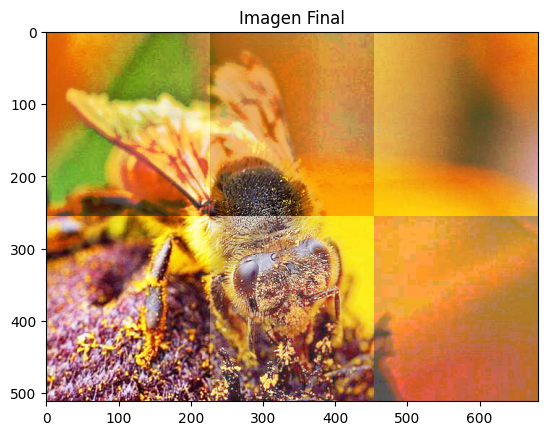

In [27]:
import cv2
# Importar imagen
original_image = cv2.imread('data/bee.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.imshow(original_image, cmap='gray')
plt.title('Imagen Original')
plt.show()

# Separación de la imagen en tiles o mosaicos
n = 6
tiles = slice('data/bee.jpg', n, save=False)

# Ecualización del histograma de cada tile
i = 0
for tile in tiles:
  i += 1
  tile_eq = exposure.equalize_hist(np.asarray(tile.image))
  imgplot = plt.imshow(tile_eq)
  if i == 1:
    tile1 = tile_eq
  if i == 2:
    tile2 = tile_eq
  if i == 3:
    tile3 = tile_eq
  if i == 4:
    tile4 = tile_eq
  if i == 5:
    tile5 = tile_eq
  if i == 6:
    tile6 = tile_eq

# Concatenar horizontalmente los dos primeros tiles
top_row = np.hstack((tile1, tile2, tile3))

# Concatenar horizontalmente los dos últimos tiles
bottom_row = np.hstack((tile4, tile5, tile6))

# Concatenar verticalmente las dos filas
final_image = np.vstack((top_row, bottom_row))

# Mostrar la imagen después de la ecualización del histograma por tile
plt.imshow(final_image, cmap='gray')
plt.title('Imagen Final')
plt.show()

**¿Cómo podrían mejorarse el aspecto entre los bloques?** Cuando se aplica la ecualización del histograma basada en mosaicos o tiles a la imagen se generan artefactos visibles en los bordes de los bloques. Algo que se observo durante los ejercicios es que cuando el número de mosaicos aumenta, el contrastes generalmente es mayor. Para mejorar el aspecto de los bloques y reducir los artefactos se pueden realizar estrategias como extender el tamaño de los bloques de manera que exista una superposición entre ellos y de esta manera aumentar en el proceso de la ecualización del tile la contribución de los bloques vecinos. Otra opción sería la aplicación de un suavizado en las regiones de superposición, por mencionar dos de las más utilizadas.

### 2.- Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.Investiga e implementa un método sencillo del Sliding Window Adaptive Histogram Equalization (SWAHE) y compara algunas imágenes con diferentes tipos de imágenes.

SWAHE es un método de procesamiento de imágenes que mejora el contraste en las imágenes al volver a mapear los valores de píxeles de una imagen a un nuevo rango de valores distribuido de manera más uniforme. Esto puede ser útil para mejorar la visibilidad de los detalles en imágenes que tienen bajo contraste o una amplia gama de valores de brillo.

Funciona dividiendo la imagen en una cuadrícula de ventanas pequeñas y superpuestas. Los valores de píxeles en cada ventana se reasignan a un nuevo rango de valores, de modo que la imagen resultante tenga una distribución más uniforme de los valores de brillo. El tamaño de las ventanas y el grado de reasignación se pueden ajustar para lograr el efecto deseado.

In [28]:
from skimage import io, exposure
import numpy as np
import matplotlib.pyplot as plt

def sliding_window(image, step_size, window_size):
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

def apply_swahe(img_path, window_size=(64, 64), step_size=4):
    # Load custom image
    img = io.imread(img_path, as_gray=True)

    # Normalize intensity values
    img = exposure.rescale_intensity(img)

    # Apply local equalization with sliding windows
    img_local = np.zeros_like(img)
    window_counts = np.zeros_like(img)

    for (x, y, window) in sliding_window(img, step_size, window_size):
        # Apply equalization to the current window
        equalized_window = exposure.equalize_adapthist(window)

        # Update the counts for each pixel
        window_counts[y:y + window_size[1], x:x + window_size[0]] += 1

        # Add the equalized window to the local image
        img_local[y:y + window_size[1], x:x + window_size[0]] += equalized_window

    # Divide by the counts to get the average
    img_local /= window_counts

    # Display results
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))

    axes[0].imshow(img, cmap=plt.cm.gray)
    axes[0].set_title('Original Image')
    axes[0].set_axis_off()

    axes[1].imshow(img_local, cmap=plt.cm.gray)
    axes[1].set_title(f'SWAHE\nWindow Size: {window_size}, Step Size: {step_size}')
    axes[1].set_axis_off()

    plt.show()

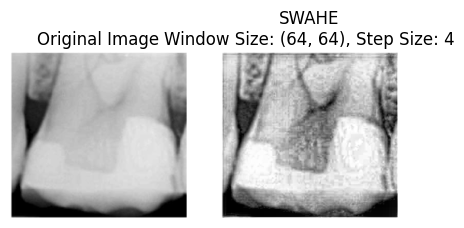

In [29]:
apply_swahe('data/SWAHE.png')

apply_swahe('data/SWAHE.png')

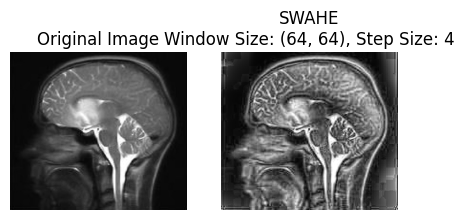

In [30]:
apply_swahe('data/medical.jpg')

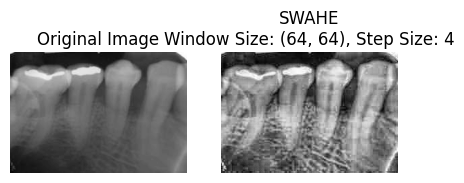

In [31]:
apply_swahe('data/swahe2.jpeg')

**3. Investiga cómo funciona el algoritmo CLAHE (contrast limited adaptive histogram equalization) y realiza una implementación (puede ser usando la implementación de OpenCV). Prueba sobre diferentes tipos de imágenes y compara con el método de ecualización de histogramas básico. Provee una breve descripción del método a partir de una  investigación bibliográfica.**

¿Qué es CLAHE?
* Contrast Limited Adaptive Histogram Equalization (CLAHE) es un algoritmo bien conocido para la Mejora del Contraste, diseñado para ser aplicado de manera amplia en el contexto del procesamiento digital de imágenes (Moré Rodríguez, L. G., 2017). El método CLAHE se utiliza para mejorar el contraste de las imágenes. Se diferencia de la ecualización de histogramas ordinaria en que el método adaptativo calcula múltiples histogramas, cada uno de los cuales corresponde a una sección separada de la imagen, y los utiliza para redistribuir los valores de brillo de la imagen. Por lo tanto, puede mejorar el contraste local y mejorar la definición de los bordes en cada región de una imagen.

¿Cómo funciona CLAHE?
* La imagen se divide en pequeños bloques llamados "tiles" (tileSize es 8x8 de forma predeterminada en OpenCV). Posteriormente, cada uno de estos bloques se ecualiza como de costumbre. Entonces, en un área pequeña, el histograma se limitaría a una región pequeña (a menos que haya ruido). Si hay ruido, se amplificará. Para evitar esto, se aplica limitación de contraste . Si algún contenedor de histograma está por encima del límite de contraste especificado (por defecto 40 en OpenCV), esos píxeles se recortan y distribuyen uniformemente a otros contenedores antes de aplicar la ecualización del histograma. Después de la ecualización, para eliminar artefactos en los bordes de los mosaicos, se aplica la interpolación bilineal (OpenCV, s.f.).

In [32]:
#Importando librerias
import cv2
from skimage import io
from matplotlib import pyplot as plt

In [33]:
def apply_clahe(image_path):
    ###########Original Image#############
    img = cv2.imread(image_path,1)
    lab_img= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    #Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)

    ###########Histogram Equlization#############
    #Apply histogram equalization to the L channel
    equ = cv2.equalizeHist(l)
    #plt.hist(equ.flat, bins=100, range=(0,255))
    #Combine the Hist. equalized L-channel back with A and B channels
    updated_lab_img1 = cv2.merge((equ,a,b))

    #Convert LAB image back to color (RGB)
    hist_eq_img = cv2.cvtColor(updated_lab_img1, cv2.COLOR_LAB2BGR)

    ###########CLAHE#########################
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #plt.hist(clahe_img.flat, bins=100, range=(0,255))

    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))

    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)


    plt.imshow(img)
    plt.title("Original image")
    plt.show()
    plt.hist(img.ravel())
    plt.title("Original image Histogram")
    plt.show()
    plt.imshow(hist_eq_img)
    plt.title("Equalized image")
    plt.show()
    plt.hist(hist_eq_img.ravel())
    plt.title("Equalized image Histogram")
    plt.show()
    plt.imshow(CLAHE_img)
    plt.title("CLAHE Image")
    plt.show()
    plt.hist(CLAHE_img.ravel())
    plt.title("CLAHE Image Histogram")
    plt.show()

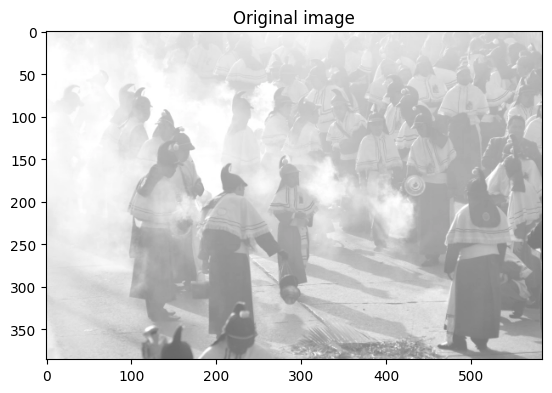

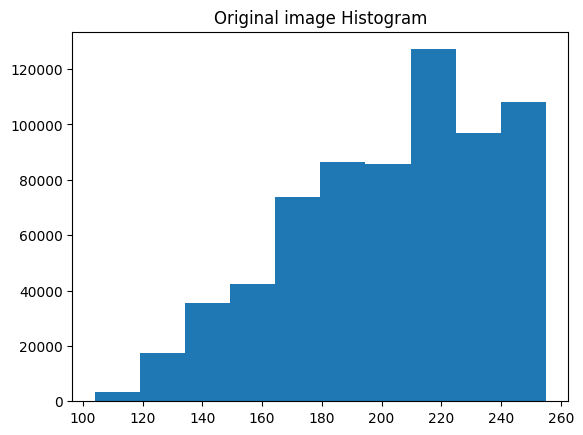

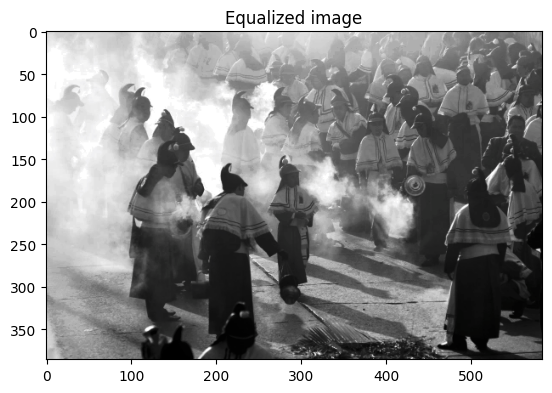

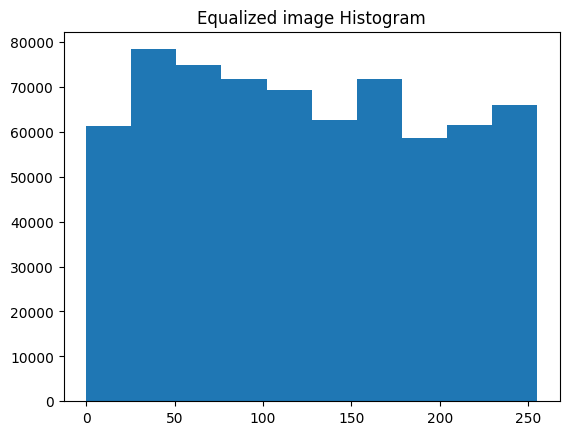

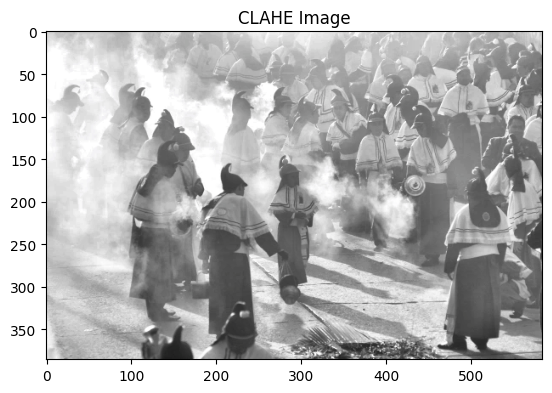

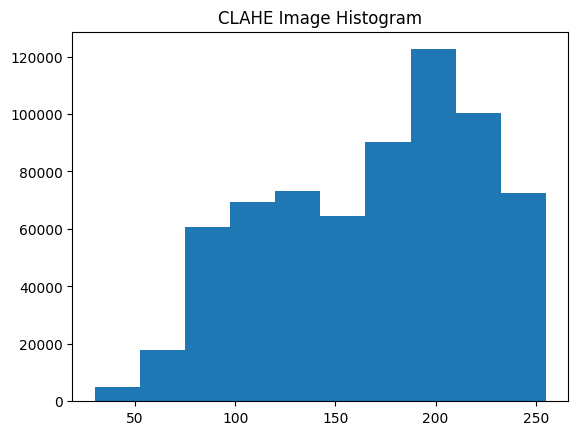

In [34]:
apply_clahe('data/monks.png')

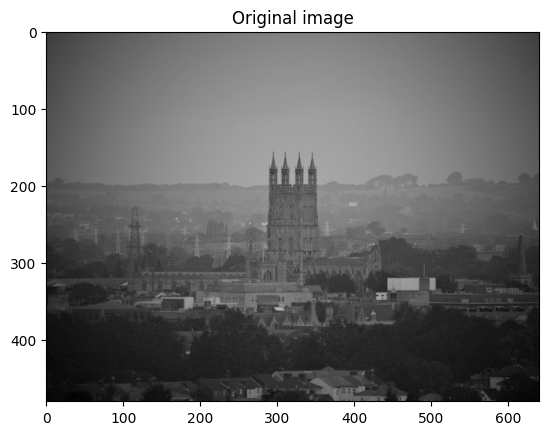

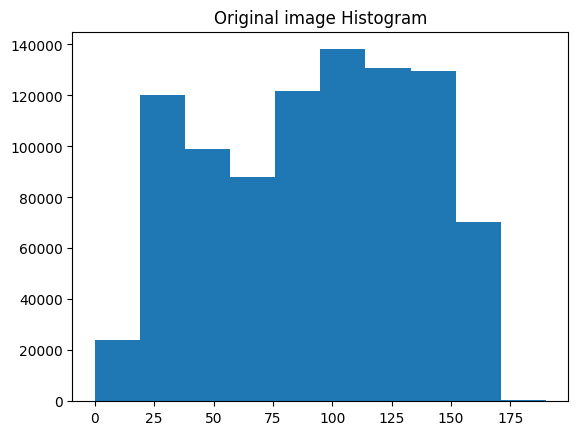

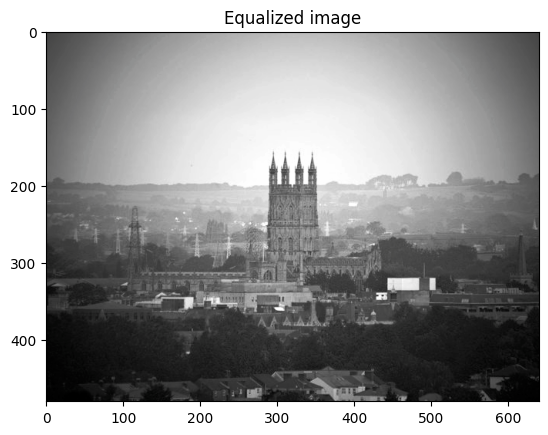

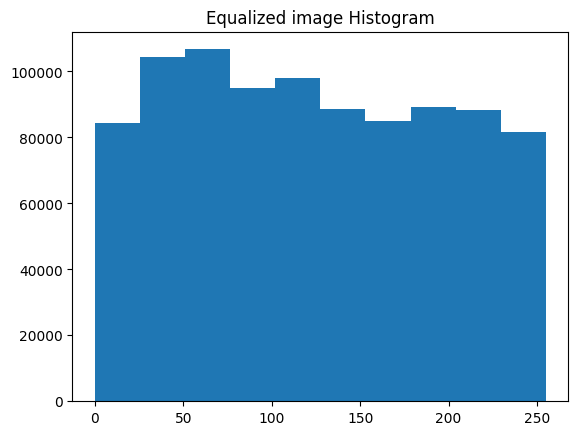

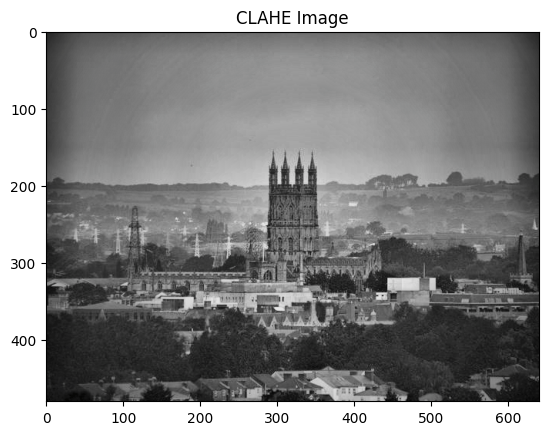

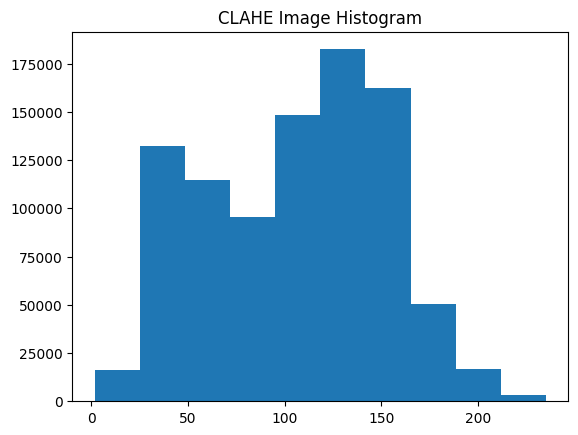

In [35]:
apply_clahe('data/church.jpg')

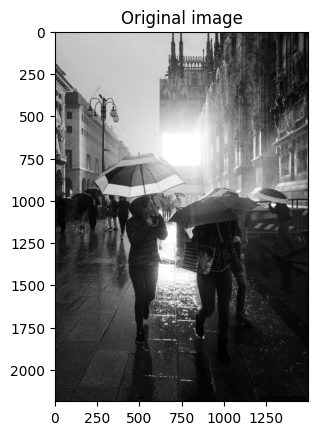

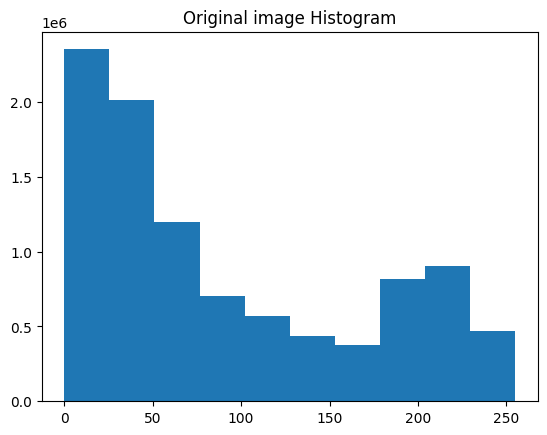

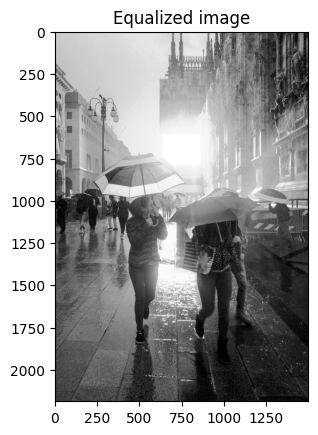

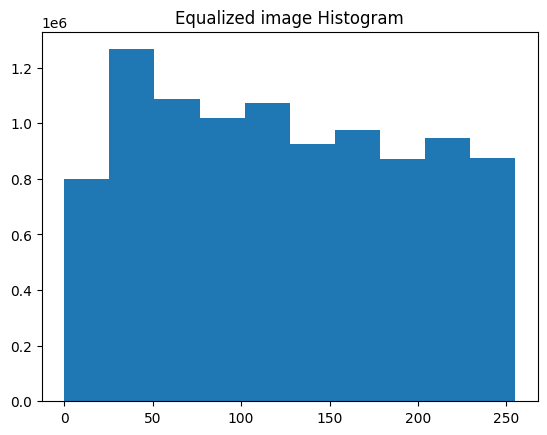

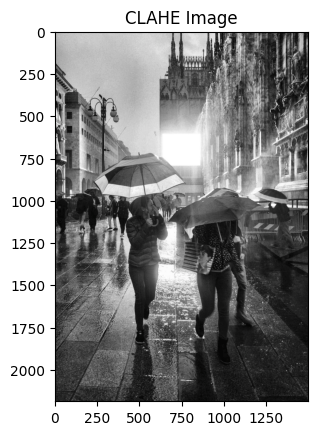

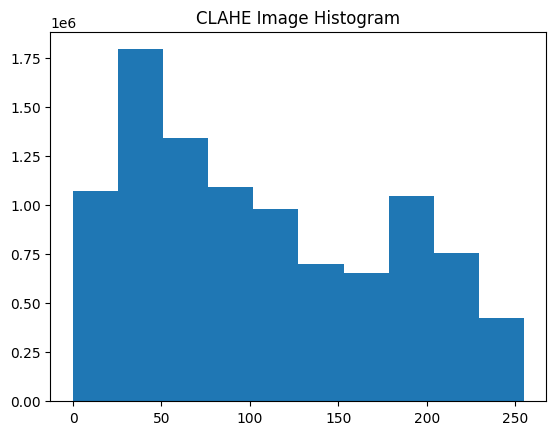

In [36]:
apply_clahe('data/rain.jpg')

**Referencias**

* Moré Rodríguez, L. G. (2017). Mejora del contraste de imágenes a color utilizando un framework de optimización Multiobjetivo (Master's thesis, FP-UNA).

* OpenCV, (s. f.). Histograms - 2: Histogram Equalization. Consultado el 21 de enero de 2024 en https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

* Sund, Torbjørn & Møystad, Anne. (2006). Sliding window adaptive histogram equalization of intraoral radiographs: Effect on image quality. Dento maxillo facial radiology. 35. 133-8. 10.1259/dmfr/21936923.